# TP03: Restauration D'images
### Ahmed Ben Saad

## I. Altération d'une image

In [117]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import cg

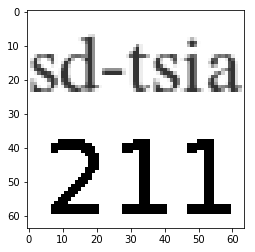

In [148]:
path='' #change for filepath
#open file
data = pickle.load(open(path+'data2018forpython2.pk','rb'))
#load the original image
X=data.get('original')
#plot image
plt.imshow(X,cmap='gray')
plt.show()

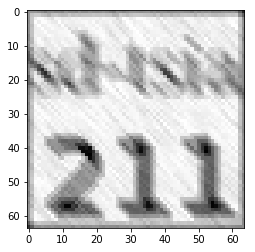

In [119]:
H=data.get('H')
h=H.toarray()
#X=np.reshape(X,(4096,1))
#XX=H*X
#XX=XX.reshape((64,64))
XX=data.get('observations')
plt.imshow(XX,cmap='gray')
plt.show()

## II. Restauration d'image par l'algorithme ADMM


### Préparation 1

# TODO REP SUR QUESTION

### Préparation 2

# TODO REP SUR QUESTION

### Préparation 3

In [120]:
T=data.get('T')
T=T.toarray()
p=4096

In [121]:
def argmin_x(x,z1,z2,g1,g2,rho,y):
    M= np.dot(np.transpose(h),h)+ rho*np.dot(np.transpose(T),T)+rho*np.eye(p)
    B=(rho*(z1+np.dot(np.transpose(T),z2))) + (np.dot(np.transpose(h),y)) - g1 - (np.dot(np.transpose(T),g2))
    x=(cg(M,B)[0]).reshape((4096,1))
    return x

### Préparation 4

# TODO TROUVER LA FORMULE DE Zk+1

In [122]:
def argmin_z1(x,rho,g1):
    minn=np.minimum(1.,(1./rho)*g1+x)
    maxx=np.maximum(0.,minn)
    return(maxx)

# TODO TROUVER LA FORMULE DE Z2 k+1

In [123]:
def seuillage_doux(z, seuil):
    if (z > seuil):
        z -= seuil
    if (z < -seuil):
        z += seuil
    if (z<=seuil and z>=-seuil):
        z = 0
    return z

In [124]:
def argmin_z2(x,rho,g2,beta,T):
    Tx=np.dot(T,x)
    rhog=(1./rho)*g2
    return((Tx+rhog)*np.maximum(0.0,1.0-(1./rho)*beta/np.linalg.norm(Tx+rhog)))
    #z2 = Tx + g2/rho
    #for i in range(len(z2)):
    #    z2[i] = seuillage_doux(z2[i], beta/rho)
    #return z2


### Préparation 5

In [125]:
def maj_g1_g2(x,z1,z2,rho,g1,g2,T):
    new_g1=g1+rho*(x-z1)
    new_g2=g2+rho*(T.dot(x)-z2)
    return (new_g1,new_g2)
    
    

## III. Implémentation de l'ADMM pour résoudre le problème de restauration d'image


In [151]:
rho=0.05
beta=0.01
kmax=100
X_Original = X.reshape((4096,1))

In [158]:
def ADMM():
    y=np.reshape(XX,(4096,1))
    x=np.zeros((4096,1))
    z1=x
    z2=T.dot(x)
    g1=x
    g2=np.zeros((4096*2-64-64,1))
    eqm=[]
    #biais=[]
    L=[]
    for i in range(kmax):
        x=argmin_x(x,z1,z2,g1,g2,rho,y)
        z1=argmin_z1(x,rho,g1)
        z2=argmin_z2(x,rho,g2,beta,T)
        g1,g2=maj_g1_g2(x,z1,z2,rho,g1,g2,T)
        eqm.append(np.mean((x-X_Original)*(x-X_Original)))
        #biais.append(np.mean(y-x))
        L_1= 0.5*(np.linalg.norm(y-np.dot(h,x)))**2
        L_2=beta*np.linalg.norm(z2,ord=1)
        L_3=np.sum(g1*(x-z1))
        L_4=np.sum(g2*(T.dot(x)-z2))
        L_5=0.5*rho*(np.linalg.norm(x-z1))**2
        L_6=0.5*rho*(np.linalg.norm(np.dot(T,x)-z2))**2
        L.append( L_1 + L_2 + L_3 + L_4 + L_5 + L_6 )
        
    x=x.reshape(64,64)
    plt.imshow(x,cmap='gray')
    plt.show()
    return(x,y,eqm,L)

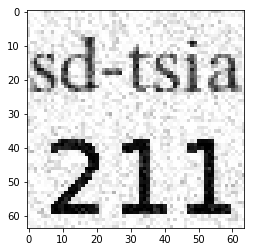

In [159]:
x,y,eqm,L = ADMM()

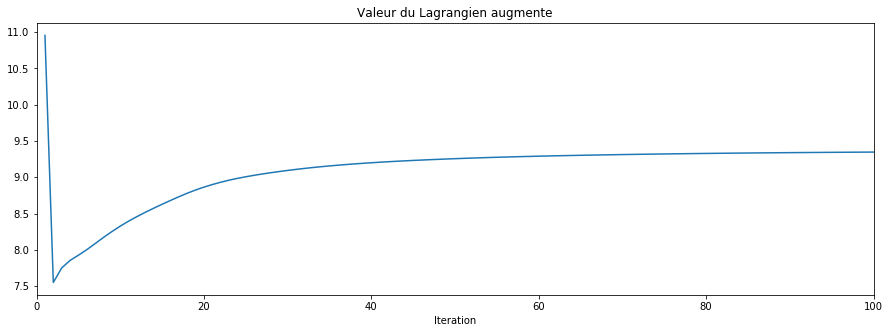

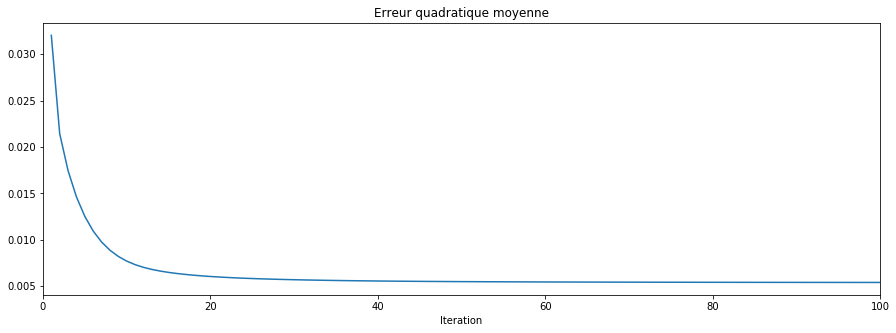

In [162]:
abscisse = range(1, kmax+1)
plt.figure(3, figsize=(15, 5))
plt.title("Valeur du Lagrangien augmente")
plt.plot(abscisse, L)
plt.xlabel("Iteration")
plt.xlim(0, 100)
plt.show()
plt.figure(3, figsize=(15, 5))
plt.title("Erreur quadratique moyenne")
plt.plot(abscisse, eqm)
plt.xlabel("Iteration")
plt.xlim(0, 100)
plt.show()

In [161]:
L

[10.953879539645287,
 7.5511244492070997,
 7.7504831033491035,
 7.8544156391333049,
 7.9261256323701224,
 8.0023710267354247,
 8.08617059183352,
 8.1715926489874491,
 8.2516310703754403,
 8.3268270844829857,
 8.3953704251852344,
 8.4585711342925443,
 8.5176825565999206,
 8.5738579667944403,
 8.62766736926039,
 8.6802239645694783,
 8.7313010926287618,
 8.7797410002230905,
 8.8242239930195865,
 8.8639204782538155,
 8.8994889104757089,
 8.931338421363666,
 8.9594947381750352,
 8.9843404436743182,
 9.0064898375045175,
 9.0267692342503274,
 9.0453695956626134,
 9.062623058485844,
 9.0786592689965868,
 9.0937052023437648,
 9.1079506802089121,
 9.1212838558195042,
 9.1336658702239646,
 9.1451406796854968,
 9.1557454586365878,
 9.165676070130429,
 9.1750118245187657,
 9.1837554689194096,
 9.1919391820302145,
 9.1995720952979898,
 9.206731573933526,
 9.2134675081329185,
 9.2197966894839745,
 9.2257471266668976,
 9.231363806577404,
 9.236679273339913,
 9.2417289319444578,
 9.2465610721662763,
 9